Computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E

Examples of ML related tasks: classification, regression, clustering, anomaly detection, Experience E refers to data

Algorithm performance evaluation P, for regression this could be some sort of normalized statistic (RMSE) and for classification this could be accuracy compared to test data


**Decision Trees**

Simple classifier that determines appropriate form of something based on input data

Example classifier based on logical rules: feature a value is less than x and feature b value is less than y --> Category/Classification 1

Shannon's entropy: measure of the amount of information gained by each decision
S = - ∑p log2 p

Information gain: the amount of information gained by a certain decision, essentially a reduction in entropy, defined as a function IG(Q)

$$IG(Q) = S - \sum_{i=1}^{q} \frac{N_i}{N}S_i = 1$$

q = number of groups after plit, N_i is number of objects from the sample in which Q is equal to the i-th value

def build(L):
    try:
        create node t
        if the stopping criterion is True:
            assign a predictive model to t
        else:
            Find the best binary split L = L_left + L_right
            t.left = build(L_left)
            t.right = build(L_right)
        return t
    except exception:
        sys.exc_clear()    

In [1]:
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
from matplotlib import pyplot as plt

%config InlineBackend.figure_format = 'retina'

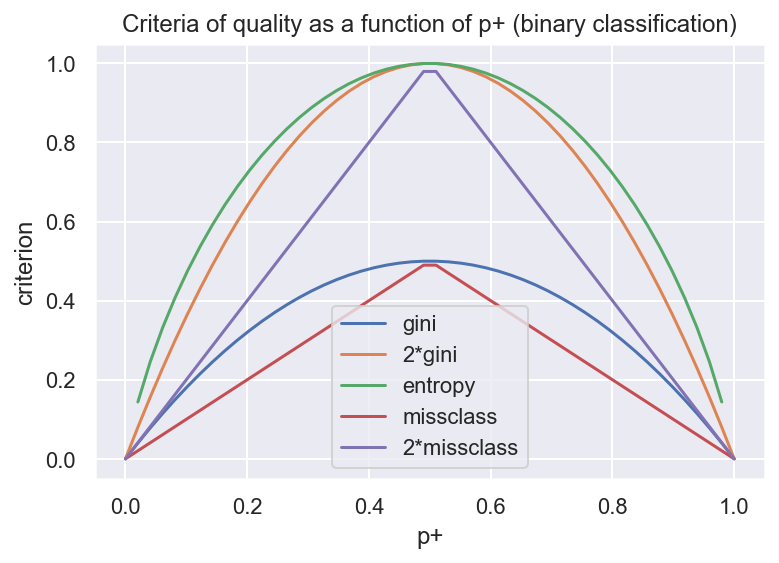

In [2]:
plt.figure(figsize=(6, 4))
xx = np.linspace(0, 1, 50)
plt.plot(xx, [2 * x * (1 - x) for x in xx], label="gini")
plt.plot(xx, [4 * x * (1 - x) for x in xx], label="2*gini")
plt.plot(xx, [-x * np.log2(x) - (1 - x) * np.log2(1 - x) for x in xx], label="entropy")
plt.plot(xx, [1 - max(x, 1 - x) for x in xx], label="missclass")
plt.plot(xx, [2 - 2 * max(x, 1 - x) for x in xx], label="2*missclass")
plt.xlabel("p+")
plt.ylabel("criterion")
plt.title("Criteria of quality as a function of p+ (binary classification)")
plt.legend();

Gini uncertainty is a measure of information gain, maximizing this criterion = maximization of the number of pairs of objects of same class that are in same subtree: $$ G = 1 - \sum_{k}(p_k)^2$$

In [3]:
# first class
np.random.seed(17)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# adding second class
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

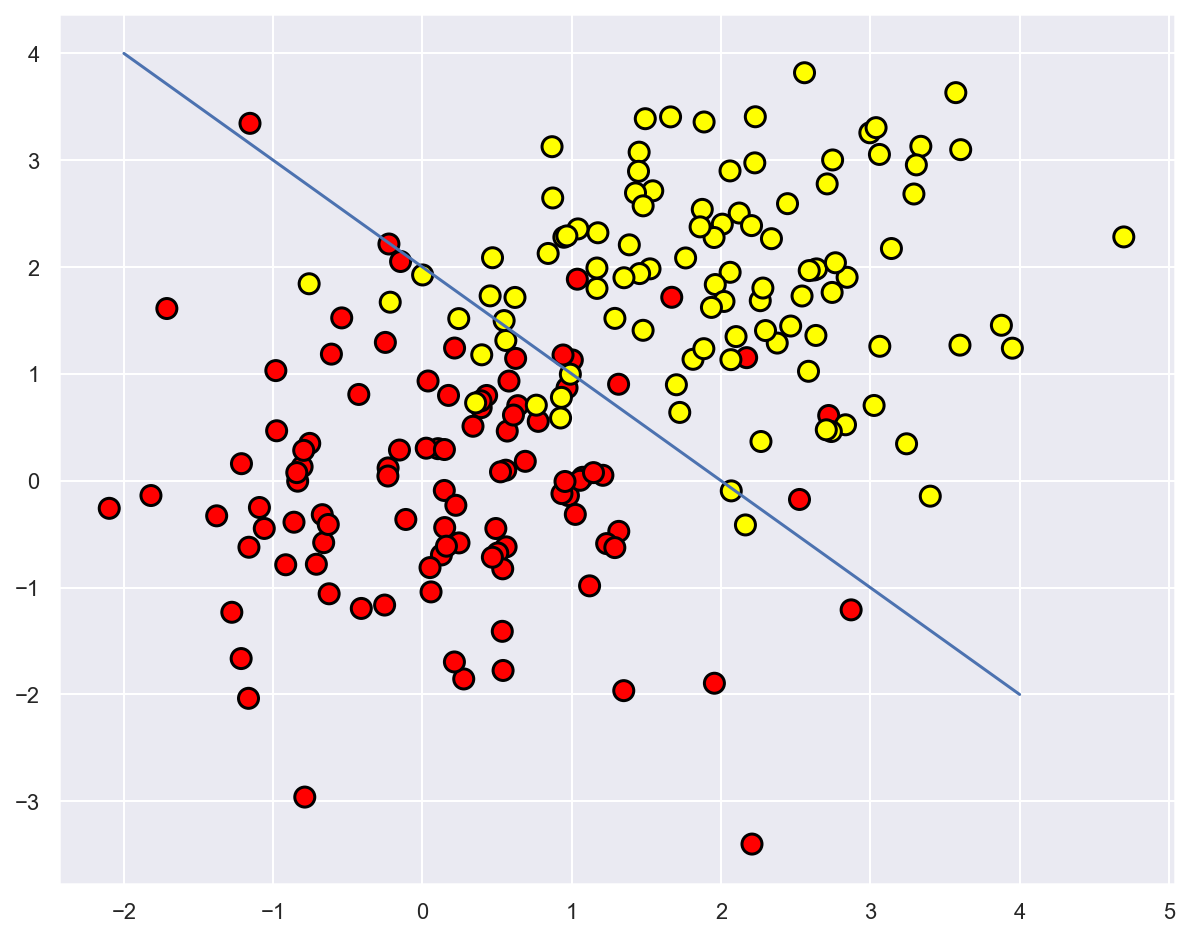

In [4]:
plt.figure(figsize=(10, 8))
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
)
plt.plot(range(-2, 5), range(4, -3, -1));

In [5]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


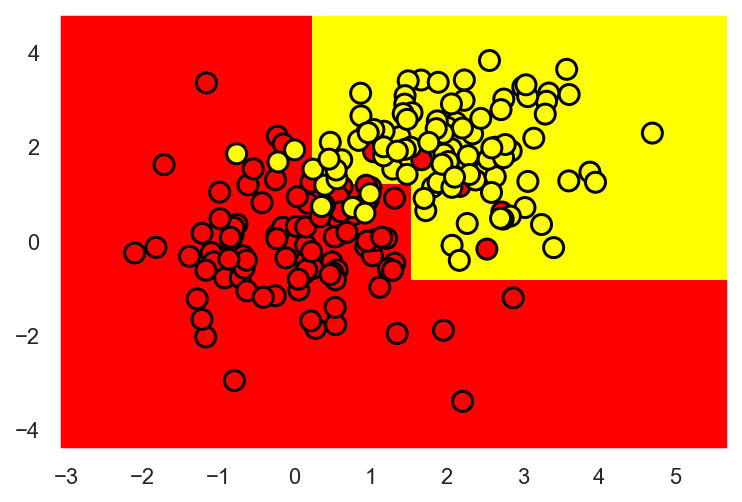

In [6]:
from sklearn.tree import DecisionTreeClassifier


# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=17)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap="autumn")
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
);

separating these two classes by training an SKlearn decision tree, visualization shows us that the tree cuts the space into 8 rectangles (tree with 8 leaves), model will then make prediction according to majority parameter /label of objects inside it

In [7]:
import pydotplus  # pip install pydotplus
from sklearn.tree import export_graphviz


def tree_graph_to_png(tree, feature_names, png_file_to_save):
    """
    This requires GraphViz to be installed.  
    """
    
    tree_str = export_graphviz(
        tree, feature_names=feature_names, filled=True, out_file=None
    )
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)



In [10]:
data = pd.DataFrame(
    {
        "Age": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
        "Loan Default": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    }
)
data.sort_values("Age")

,Age,Loan Default
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


Conclusion: the simplest heuristics for handling numeric features in a decision tree is to sort its values in ascending order and check only those thresholds where the value of the target variable changes.



If each leaf had only one existence, we wouls overfit the model and this would not be useful to interpret newer data (visualizations often show sharp cuts and differentiations in data instead of general, smoother interpretation)

Random Forest averages responses from individual trees that are built to maximum depth

Pruning trees: each tree is constructed to maximum depth, then from bottom up some nodes of tree are removed by comparing quality of tree with and without partition (cross-validation)

main parameters of sklearn.tree.DecisionTreeClassifier:
    max_depth: maximum depth of tree
    max_features = maximum number of features with which to search for the best partition
    min_samples_leaf: minimum number of samples in a leaf, prevents creating trees where any leaf would only have a few members (avoids overfitting)

For regression, variance formula is used

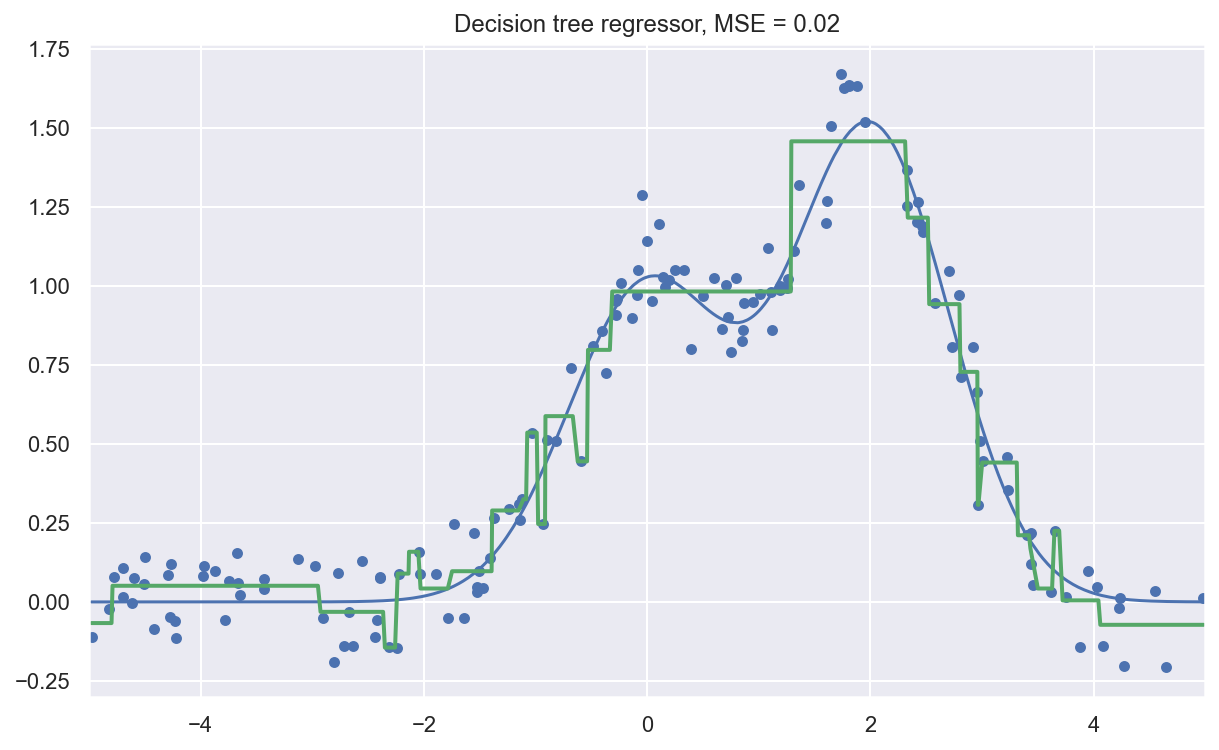

In [12]:
n_train = 150
n_test = 1000
noise = 0.1


def f(x):
    x = x.ravel()
    return np.exp(-(x ** 2)) + 1.5 * np.exp(-((x - 2) ** 2))


def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = (
        np.exp(-(X ** 2))
        + 1.5 * np.exp(-((X - 2) ** 2))
        + np.random.normal(0.0, noise, n_samples)
    )
    X = X.reshape((n_samples, 1))
    return X, y


X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title(
    "Decision tree regressor, MSE = %.2f"
    % (np.sum((y_test - reg_tree_pred) ** 2) / n_test)
)
plt.show()

Decision tree approximates data with a piecewise constant function 

**Nearest Neighbors**

Steps to classify a sample
1. Calculate distance to each of the samples in training set
2. Select k samples from the training set with minimal distance to them
3. The class of the test sample will be the most frequent class among those k nearest neighbors

k-NN is a theoretically optimal algorithm
Useful for recommendation systems or classifications

Quality of this algorithm depends on
1. Number of neighbors k
2. Distance measure between samples (data must be scaled)
3. Weights of neighbors (further the sample, the lower the weight)

Parameters of sklearn.KNN algorithm
1. Weights: could be uniform(all weights are equal, distance (weight inversely proprtional to distance from test sample)
2. Algorithm: brute, ball_tree, KD_tree, or auto
    - brute: NN for each test case computed by grid search algorithm
    - ball_tree and KD_tree: distances between examples stored in tree to accelerate finding nearest neighbors
    - auto: optimal algorithm chosen by model
    - leaf size (if using ball_tree or kd_tree)
    - metric for analysis (minkowski, euclidean, etc)


**Choosing Model Parameters and Cross-Validation**
To avoid overfitting, we can break down training dataset into 20 80 splits and compute performance metrics for model on hold-out set

K-fold cross validation, model is trained K times on (K-1) subsets of original dataset and checked on remaining subset, obtain K model quality assessments that are averaged to give an overall quality of classification/regression

Application Examples and Complex Cases

Cross Validation Steps
1. Load/Clean Data
2. Create a test_split (usually 30-40)
3. Create a KNN with a random number of n_neighbors
4. Scale data using StandardScaler
5. Check scores for each of the models using accuracy_score
6. Then use GridSearchCV to identify parameters for tree using cross-validation
    - for each unique pair of values of max_depth and max_features, model performance with 5-fold cross-valdiation is calculated, and then best combination of aparameters is chosen
7. Check for best parameters using best_params_ command


In [18]:
#Tuning kNN numbers
#from sklearn.pipeline import Pipeline

#knn_pipe = Pipeline(
    #[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_jobs=-1))]
#)

#knn_params = {"knn__n_neighbors": range(1, 10)}

#knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

#knn_grid.fit(X_train, y_train)

#knn_grid.best_params_, knn_grid.best_score_

In example case given, Random forest algorithm works best

Complex Case for Decision Trees


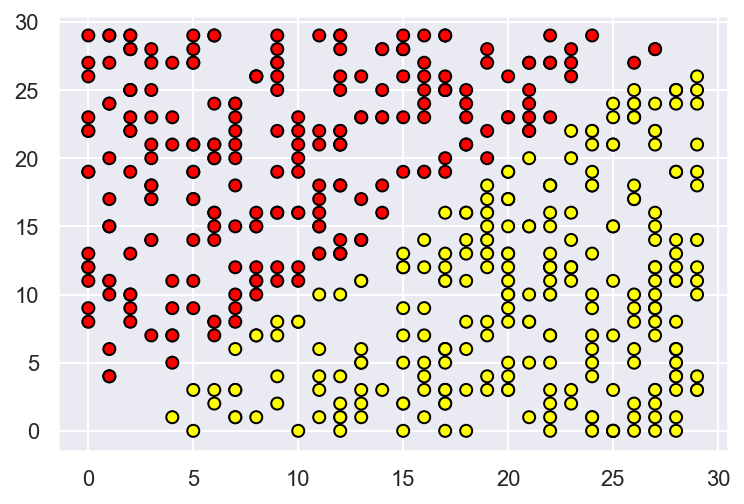

In [22]:
def form_linearly_separable_data(n=500, x1_min=0, x1_max=30, x2_min=0, x2_max=30):
    data, target = [], []
    for i in range(n):
        x1 = np.random.randint(x1_min, x1_max)
        x2 = np.random.randint(x2_min, x2_max)
        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    return np.array(data), np.array(target)


X, y = form_linearly_separable_data()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="autumn", edgecolors="black");

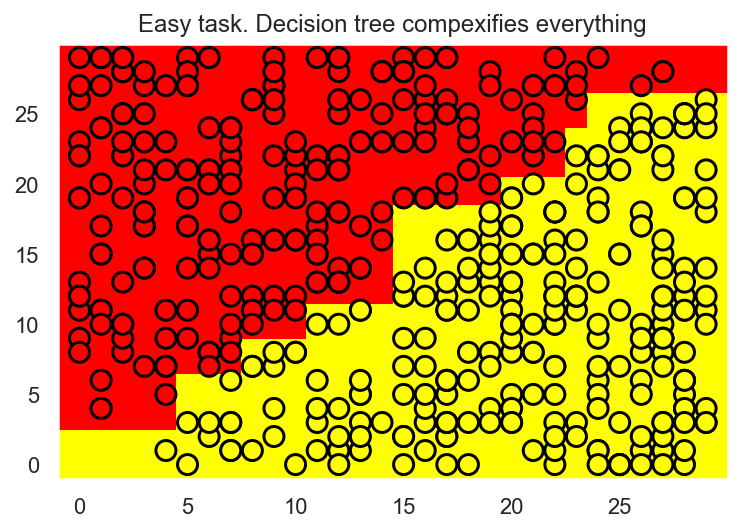

In [23]:
tree = DecisionTreeClassifier(random_state=17).fit(X, y)

xx, yy = get_grid(X)
predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap="autumn")
plt.scatter(
    X[:, 0], X[:, 1], c=y, s=100, cmap="autumn", edgecolors="black", linewidth=1.5
)
plt.title("Easy task. Decision tree compexifies everything");


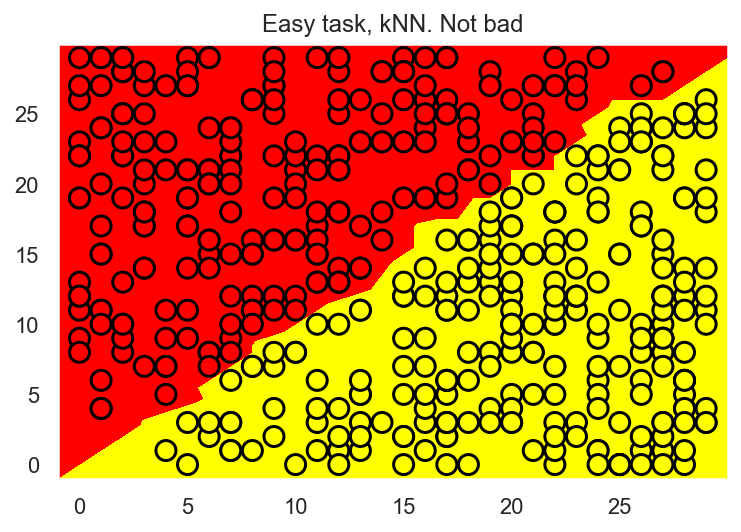

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1).fit(X, y)

xx, yy = get_grid(X)
predicted = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap="autumn")
plt.scatter(
    X[:, 0], X[:, 1], c=y, s=100, cmap="autumn", edgecolors="black", linewidth=1.5
)
plt.title("Easy task, kNN. Not bad");

In [26]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target

X[0, :].reshape([8, 8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

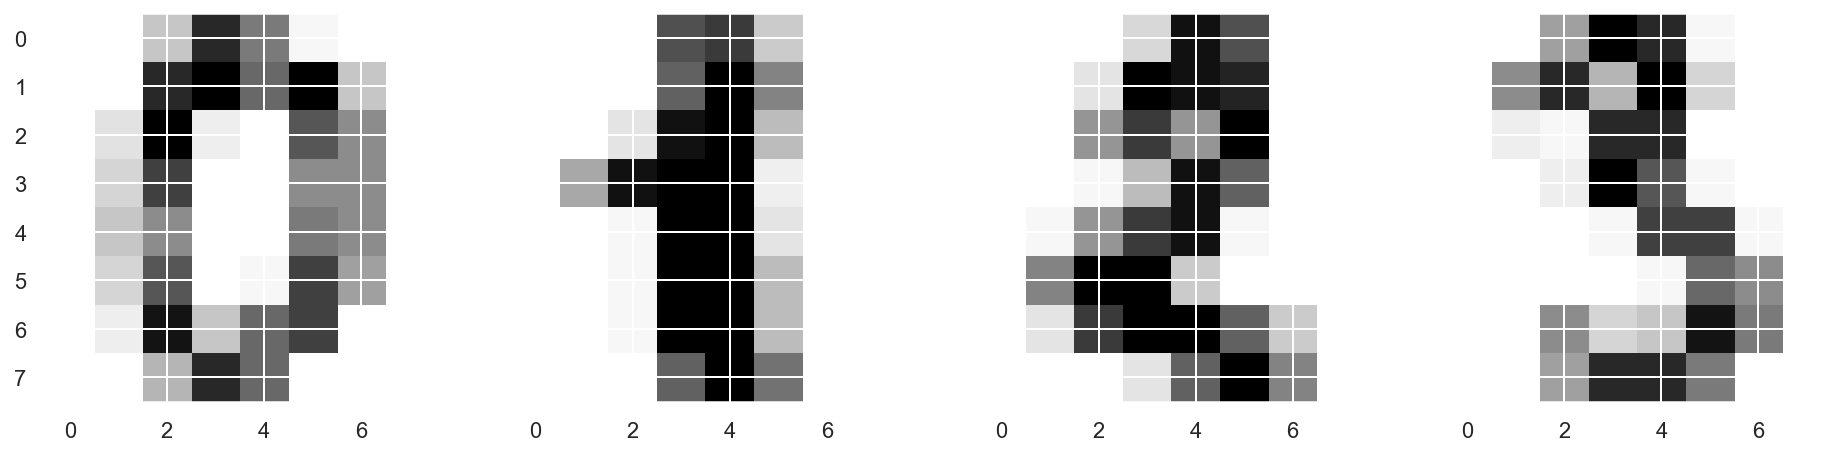

In [27]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16, 6))
for i in range(4):
    axes[i].imshow(X[i, :].reshape([8, 8]), cmap="Greys");

In [35]:
from sklearn.model_selection import *
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


X_train, X_holdout, y_train, y_holdout = train_test_split(
    X, y, test_size=0.3, random_state=17
)
#splitting/holding off some data

In [36]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=10))]
)

tree.fit(X_train, y_train)
knn_pipe.fit(X_train, y_train);
#creating tree with random depth and state, as well as a pipeline to scale data and create a kNN with random number of neighbors

In [37]:
tree_pred = tree.predict(X_holdout)
knn_pred = knn_pipe.predict(X_holdout)
accuracy_score(y_holdout, knn_pred), accuracy_score(
    y_holdout, tree_pred
)  # (0.976, 0.666)

(0.975925925925926, 0.6666666666666666)

In [39]:
tree_params = {
    "max_depth": [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
    "max_features": [1, 2, 3, 5, 10, 20, 30, 50, 64],
}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
                         'max_features': [1, 2, 3, 5, 10, 20, 30, 50, 64]},
             verbose=True)

In [40]:
tree_grid.best_params_, tree_grid.best_score_  # ({'max_depth': 20, 'max_features': 64}, 0.844)

({'max_depth': 10, 'max_features': 50}, 0.8568203376968316)

In [41]:
np.mean(
    cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=5)
)  # 0.987

0.9864858028204642

For this dataset, kNN performs best

In [42]:
def form_noisy_data(n_obj=1000, n_feat=100, random_seed=17):
    np.seed = random_seed
    y = np.random.choice([-1, 1], size=n_obj)

    # first feature is proportional to target
    x1 = 0.3 * y

    # other features are noise

    x_other = np.random.random(size=[n_obj, n_feat - 1])

    return np.hstack([x1.reshape([n_obj, 1]), x_other]), y


X, y = form_noisy_data()


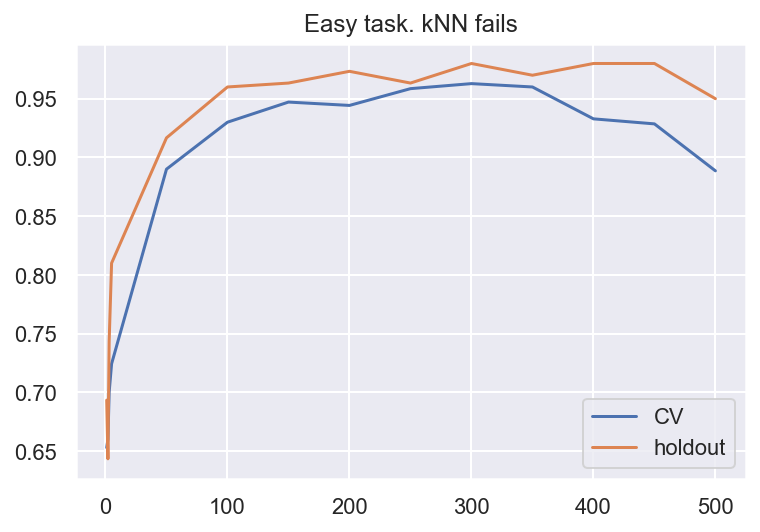

In [44]:
X_train, X_holdout, y_train, y_holdout = train_test_split(
    X, y, test_size=0.3, random_state=17
)

from sklearn.model_selection import cross_val_score

cv_scores, holdout_scores = [], []
n_neighb = [1, 2, 3, 5] + list(range(50, 550, 50))

for k in n_neighb:

    knn_pipe = Pipeline(
        [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]
    )
    cv_scores.append(np.mean(cross_val_score(knn_pipe, X_train, y_train, cv=5)))
    knn_pipe.fit(X_train, y_train)
    holdout_scores.append(accuracy_score(y_holdout, knn_pipe.predict(X_holdout)))

plt.plot(n_neighb, cv_scores, label="CV")
plt.plot(n_neighb, holdout_scores, label="holdout")
plt.title("Easy task. kNN fails")
plt.legend();

In [45]:
tree = DecisionTreeClassifier(random_state=17, max_depth=1)
tree_cv_score = np.mean(cross_val_score(tree, X_train, y_train, cv=5))
tree.fit(X_train, y_train)
tree_holdout_score = accuracy_score(y_holdout, tree.predict(X_holdout))
print("Decision tree. CV: {}, holdout: {}".format(tree_cv_score, tree_holdout_score))

Decision tree. CV: 1.0, holdout: 1.0


Decision trees

Pros:

- Generation of clear human-understandable classification rules, e.g. "if age <25 and is interested in motorcycles, deny the loan". 
- This property is called interpretability of the model.
- Decision trees can be easily visualized, i.e. both the model itself (the tree) and prediction for a certain test object (a path in the tree) can "be interpreted".
- Fast training and forecasting.
- Small number of model parameters.
- Supports both numerical and categorical features.
Cons:

- The trees are very sensitive to the noise in input data; the whole model could change if the training set is slightly modified (e.g. remove a feature, add some objects). This impairs the interpretability of the model.
- Separating border built by a decision tree has its limitations – it consists of hyperplanes perpendicular to one of the coordinate axes, which is inferior in quality to some other methods, in practice.
- We need to avoid overfitting by pruning, setting a minimum number of samples in each leaf, or defining a maximum depth for the tree. Note that overfitting is an issue for all machine learning methods.
- Instability. Small changes to the data can significantly change the decision tree. This problem is tackled with decision tree ensembles (discussed next time).
- The optimal decision tree search problem is NP-complete. Some heuristics are used in practice such as greedy search for a feature with maximum information gain, but it does not guarantee finding the globally optimal tree.
- Difficulties to support missing values in the data. Friedman estimated that it took about 50% of the code to support gaps in data in CART (an improved version of this algorithm is implemented in sklearn).
- The model can only interpolate but not extrapolate (the same is true for random forests and tree boosting). That is, a decision tree makes constant prediction for the objects that lie beyond the bounding box set by the training set in the feature space. In our example with the yellow and blue balls, it would mean that the model gives the same predictions for all balls with positions >19 or <0.
- The nearest neighbors method

Pros:

- Simple implementation;
- Well studied;
- Typically, the method is a good first solution not only for classification or regression, but also recommendations;
- It can be adapted to a certain problem by choosing the right metrics or kernel (in a nutshell, the kernel may set the similarity operation for complex objects such as graphs while keeping the k-NN approach the same). By the way, Alexander Dyakonov, a former top-1 kaggler, loves the simplest k-NN but with the tuned object similarity metric;
- Good interpretability. There are exceptions: if the number of neighbors is large, the interpretability deteriorates ("We did not give him a loan, because he is similar to the 350 clients, of which 70 are the bad, and that is 12% higher than the average for the dataset").
Cons:

- Method considered fast in comparison with compositions of algorithms, but the number of neighbors used for classification is usually large (100-150) in real life, in which case the algorithm will not operate as fast as a decision tree.
- If a dataset has many variables, it is difficult to find the right weights and to determine which features are not important for classification/regression.
- Dependency on the selected distance metric between the objects. Selecting the Euclidean distance by default is often unfounded. You can find a good solution by grid searching over parameters, but this becomes very time consuming for large datasets.
- There are no theoretical ways to choose the number of neighbors – only grid search (though this is often true for all hyperparameters of all models). In the case of a small number of neighbors, the method is sensitive to outliers, that is, it is inclined to overfit.
- As a rule, it does not work well when there are a lot of features due to the "curse of dimensionality". Professor Pedro Domingos, a well-known member in the ML community, talks about it here in his popular paper, "A Few Useful Things to Know about Machine Learning"; also "the curse of dimensionality" is described in the Deep Learning book in this chapter.

# Assignment

In [46]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (10, 8)
import collections
from io import StringIO

import numpy as np
import pandas as pd
import pydotplus  # pip install pydotplus
import seaborn as sns
from ipywidgets import Image
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [47]:
def create_df(dic, feature_list):
    out = pd.DataFrame(dic)
    out = pd.concat([out, pd.get_dummies(out[feature_list])], axis=1)
    out.drop(feature_list, axis=1, inplace=True)
    return out


In [48]:
def intersect_features(train, test):
    common_feat = list(set(train.keys()) & set(test.keys()))
    return train[common_feat], test[common_feat]

In [49]:
features = ["Looks", "Alcoholic_beverage", "Eloquence", "Money_spent"]



In [50]:
df_train = {}
df_train["Looks"] = [
    "handsome",
    "handsome",
    "handsome",
    "repulsive",
    "repulsive",
    "repulsive",
    "handsome",
]
df_train["Alcoholic_beverage"] = ["yes", "yes", "no", "no", "yes", "yes", "yes"]
df_train["Eloquence"] = ["high", "low", "average", "average", "low", "high", "average"]
df_train["Money_spent"] = ["lots", "little", "lots", "little", "lots", "lots", "lots"]
df_train["Will_go"] = LabelEncoder().fit_transform(["+", "-", "+", "-", "-", "+", "+"])

df_train = create_df(df_train, features)
df_train

,Will_go,Looks_handsome,Looks_repulsive,Alcoholic_beverage_no,Alcoholic_beverage_yes,Eloquence_average,Eloquence_high,Eloquence_low,Money_spent_little,Money_spent_lots
0,0,1,0,0,1,0,1,0,0,1
1,1,1,0,0,1,0,0,1,1,0
2,0,1,0,1,0,1,0,0,0,1
3,1,0,1,1,0,1,0,0,1,0
4,1,0,1,0,1,0,0,1,0,1
5,0,0,1,0,1,0,1,0,0,1
6,0,1,0,0,1,1,0,0,0,1


In [55]:
df_test = {}
df_test["Looks"] = ["handsome", "handsome", "repulsive"]
df_test["Alcoholic_beverage"] = ["no", "yes", "yes"]
df_test["Eloquence"] = ["average", "high", "average"]
df_test["Money_spent"] = ["lots", "little", "lots"]
df_test = create_df(df_test, features)
df_test
# Some feature values are present in train and absent in test and vice-versa.
y = df_train['Will_go']
df_train, df_test = intersect_features(train=df_train, test=df_test)
df_train

,Looks_repulsive,Eloquence_average,Alcoholic_beverage_no,Money_spent_little,Looks_handsome,Money_spent_lots,Eloquence_high,Alcoholic_beverage_yes
0,0,0,0,0,1,1,1,1
1,0,0,0,1,1,0,0,1
2,0,1,1,0,1,1,0,0
3,1,1,1,1,0,0,0,0
4,1,0,0,0,0,1,0,1
5,1,0,0,0,0,1,1,1
6,0,1,0,0,1,1,0,1


Initial Entropy: 
    $$S_0 = -\frac{3}{7}log_2\frac{3}{7}-\frac{4}{7}log_2\frac{4}{7} = 0.985$$

Entropy after splitting data by Look_handsome

Left Side: $$S_0 = -\frac{1}{4}log_2\frac{1}{4}-\frac{3}{4}log_2\frac{3}{4} = 0.811$$
Right Side:  $$S_0 = -\frac{2}{3}log_2\frac{2}{3}-\frac{1}{3}log_2\frac{1}{3} = 0.918$$

In [56]:
class_tree = DecisionTreeClassifier(criterion='entropy', random_state=17)
class_tree.fit(df_train,y)

DecisionTreeClassifier(criterion='entropy', random_state=17)

In [58]:
balls = [1 for i in range(9)] + [0 for i in range(11)]
# two groups
balls_left = [1 for i in range(8)] + [0 for i in range(5)]  # 8 blue and 5 yellow
balls_right = [1 for i in range(1)] + [0 for i in range(6)]  # 1 blue and 6 yellow

In [61]:
from math import log


def entropy(a_list):
    lst = list(a_list)
    size = len(lst)
    entropy = 0
    set_elements = len(set(lst))
    if set_elements in [0, 1]:
        return 0
    for i in set(lst):
        occ = lst.count(i)
        entropy -= occ / size * log(occ / size, 2)
    return entropy

In [62]:
print(entropy(balls))  # 9 blue and 11 yellow ones
print(entropy(balls_left))  # 8 blue and 5 yellow ones
print(entropy(balls_right))  # 1 blue and 6 yellow ones
print(entropy([1, 2, 3, 4, 5, 6]))  # entropy of a fair 6-sided die 

11
9
0.9927744539878084
5
8
0.961236604722876
6
1
0.5916727785823275
1
1
1
1
1
1
2.584962500721156


In [69]:
balls = [1 for i in range(9)] + [0 for i in range(9)]

print(entropy(balls)) 

9
9
1.0


In [70]:
def information_gain(root, left, right):
    """ root - initial data, left and right - two partitions of initial data"""

    return (
        entropy(root)
        - 1.0 * len(left) / len(root) * entropy(left)
        - 1.0 * len(right) / len(root) * entropy(right)
    )

In [71]:
print(information_gain(balls, balls_left, balls_right))

9
9
5
8
6
1
0.0756785938070178


In [73]:
def information_gains(X, y):
    """Outputs information gain when splitting with each feature"""
    out = []
    for i in X.columns:
        out.append(information_gain(y, y[X[i] == 0], y[X[i] == 1]))
    return out

In [74]:
information_gains(df_train, y)



4
3
3
1
1
2
4
3
2
2
2
1
4
3
3
2
1
1
4
3
4
1
4
3
1
2
3
1
4
3
4
1
4
3
2
3
4
3
1
1
3
2


[0.12808527889139454,
 0.02024420715375619,
 0.005977711423774124,
 0.46956521111470706,
 0.12808527889139454,
 0.46956521111470706,
 0.2916919971380598,
 0.005977711423774124]

In [75]:
def btree(X, y, feature_names):
    clf = information_gains(X, y)
    best_feat_id = clf.index(max(clf))
    best_feature = feature_names[best_feat_id]
    print(f"Best feature to split: {best_feature}")

    x_left = X[X.iloc[:, best_feat_id] == 0]
    x_right = X[X.iloc[:, best_feat_id] == 1]
    print(f"Samples: {len(x_left)} (left) and {len(x_right)} (right)")

    y_left = y[X.iloc[:, best_feat_id] == 0]
    y_right = y[X.iloc[:, best_feat_id] == 1]
    entropy_left = entropy(y_left)
    entropy_right = entropy(y_right)
    print(f"Entropy: {entropy_left} (left) and {entropy_right} (right)")
    print("_" * 30 + "\n")
    if entropy_left != 0:
        print(f"Splitting the left group with {len(x_left)} samples:")
        btree(x_left, y_left, feature_names)
    if entropy_right != 0:
        print(f"Splitting the right group with {len(x_right)} samples:")
        btree(x_right, y_right, feature_names)

In [76]:
btree(df_train, y, df_train.columns)



4
3
3
1
1
2
4
3
2
2
2
1
4
3
3
2
1
1
4
3
4
1
4
3
1
2
3
1
4
3
4
1
4
3
2
3
4
3
1
1
3
2
Best feature to split: Money_spent_little
Samples: 5 (left) and 2 (right)
4
1
Entropy: 0.7219280948873623 (left) and 0 (right)
______________________________

Splitting the left group with 5 samples:
4
1
1
1
4
1
2
1
4
1
3
1
4
1
4
1
4
1
1
1
4
1
4
1
4
1
2
1
4
1
3
1
Best feature to split: Looks_repulsive
Samples: 3 (left) and 2 (right)
1
1
Entropy: 0 (left) and 1.0 (right)
______________________________

Splitting the right group with 2 samples:
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
Best feature to split: Eloquence_high
Samples: 1 (left) and 1 (right)
Entropy: 0 (left) and 0 (right)
______________________________



In [77]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [78]:
data_train = pd.read_csv(DATA_PATH + "adult_train.csv", sep=";")

In [79]:
data_train.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [81]:
data_test = pd.read_csv(DATA_PATH + "adult_test.csv", sep=";")
data_test = data_test[
    (data_test["Target"] == " >50K.") | (data_test["Target"] == " <=50K.")
]

# encode target variable as integer
data_train.loc[data_train["Target"] == " <=50K", "Target"] = 0
data_train.loc[data_train["Target"] == " >50K", "Target"] = 1

data_test.loc[data_test["Target"] == " <=50K.", "Target"] = 0
data_test.loc[data_test["Target"] == " >50K.", "Target"] = 1

In [82]:
data_test.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,16281,73,35,461,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Workclass,15318,8,Private,11210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,16281.0,NaN,NaN,NaN,189435.677784,105714.907671,13492.0,116736.0,177831.0,238384.0,1490400.0
Education,16281,16,HS-grad,5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Num,16281.0,NaN,NaN,NaN,10.072907,2.567545,1.0,9.0,10.0,12.0,16.0
Martial_Status,16281,7,Married-civ-spouse,7403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,15315,14,Prof-specialty,2032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relationship,16281,6,Husband,6523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,16281,5,White,13946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,16281,2,Male,10860,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
data_train["Target"].value_counts()

0    24720
1     7841
Name: Target, dtype: int64

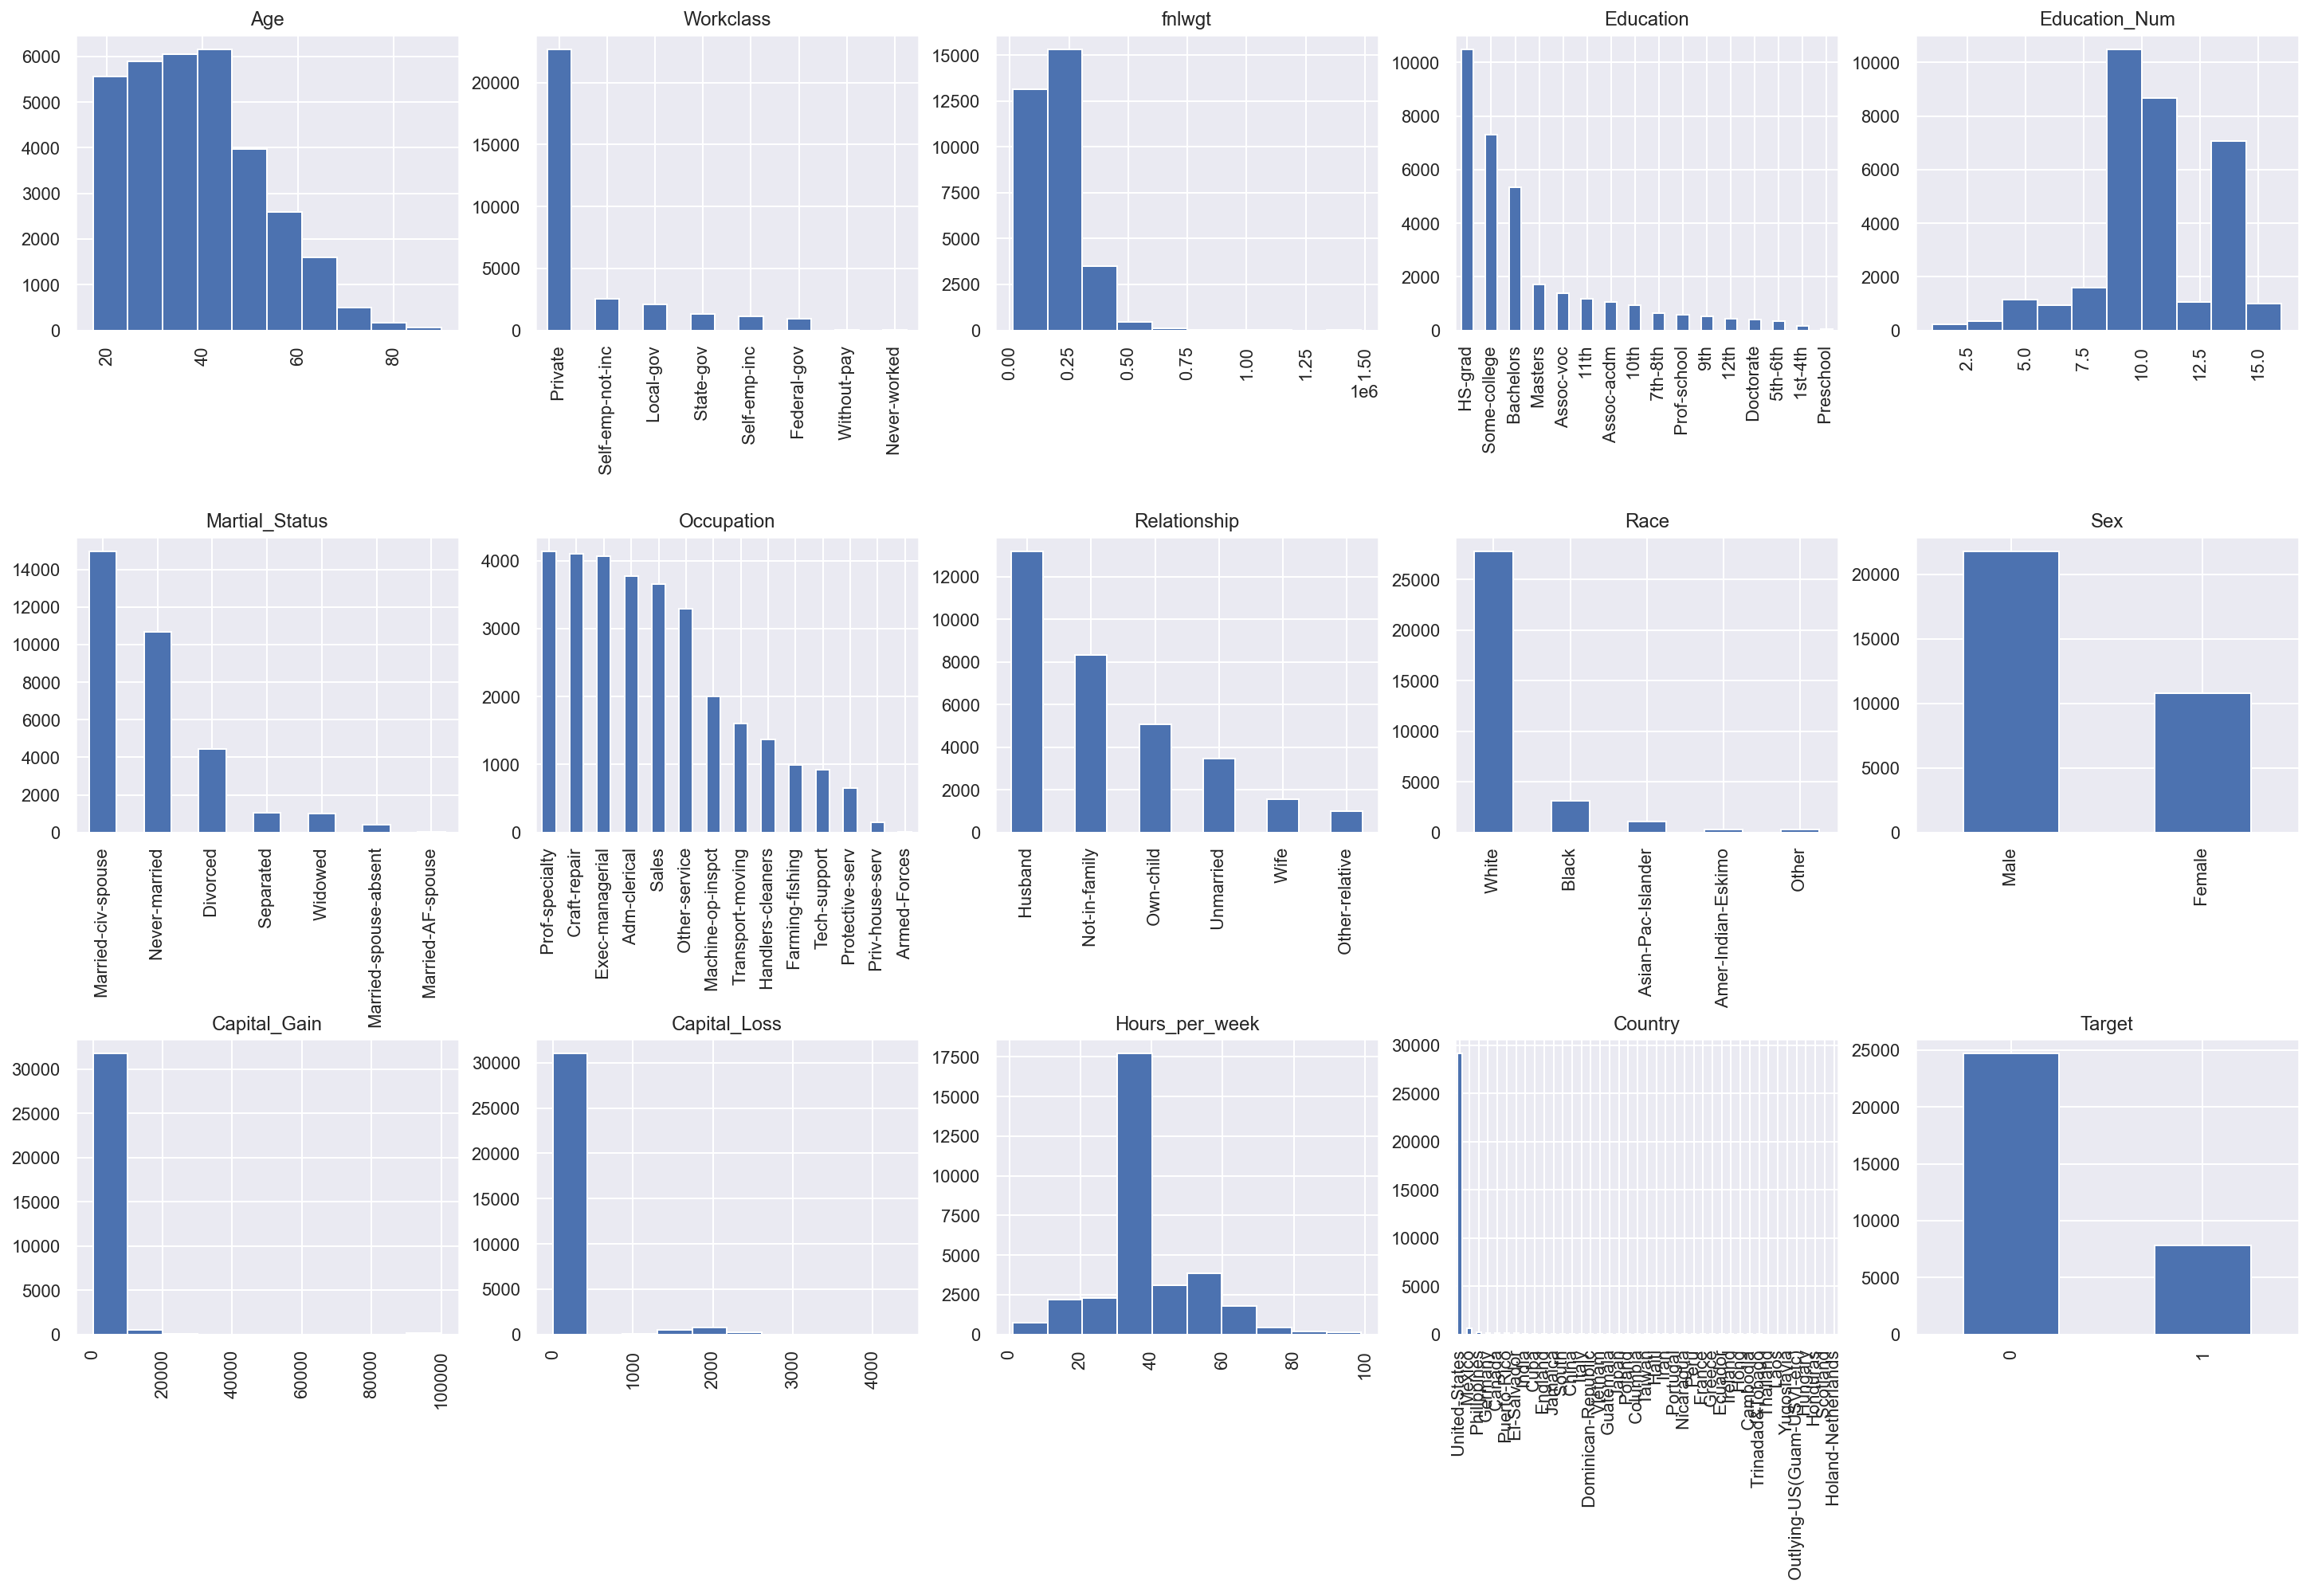

In [84]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = int(data_train.shape[1] / cols)
for i, column in enumerate(data_train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data_train.dtypes[column] == np.object:
        data_train[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data_train[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2);

In [85]:
data_train.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education_Num      int64
Martial_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_per_week     int64
Country           object
Target            object
dtype: object

In [86]:
data_test["fnlwgt"] = data_test["fnlwgt"].astype(int)
data_test["Education_Num"] = data_test["Education_Num"].astype(int)
data_test["Capital_Gain"] = data_test["Capital_Gain"].astype(int)
data_test["Capital_Loss"] = data_test["Capital_Loss"].astype(int)
data_test["Hours_per_week"] = data_test["Hours_per_week"].astype(int)

In [87]:

categorical_columns = [
    c for c in data_train.columns if data_train[c].dtype.name == "object"
]
numerical_columns = [
    c for c in data_train.columns if data_train[c].dtype.name != "object"
]

print("categorical_columns:", categorical_columns)
print("numerical_columns:", numerical_columns)

categorical_columns: ['Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country', 'Target']
numerical_columns: ['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week']


In [88]:

for c in categorical_columns:
    data_train[c].fillna(data_train[c].mode()[0], inplace=True)
    data_test[c].fillna(data_train[c].mode()[0], inplace=True)

for c in numerical_columns:
    data_train[c].fillna(data_train[c].median(), inplace=True)
    data_test[c].fillna(data_train[c].median(), inplace=True)

In [89]:
data_train = pd.concat(
    [data_train[numerical_columns], pd.get_dummies(data_train[categorical_columns])],
    axis=1,
)

data_test = pd.concat(
    [data_test[numerical_columns], pd.get_dummies(data_test[categorical_columns])],
    axis=1,
)
set(data_train.columns) - set(data_test.columns)
data_train.shape, data_test.shape

((32561, 106), (16281, 105))

In [90]:
data_test["Country_ Holand-Netherlands"] = 0
set(data_train.columns) - set(data_test.columns)

set()

In [91]:
X_train = data_train.drop(["Target"], axis=1)
y_train = data_train["Target"]

X_test = data_test.drop(["Target"], axis=1)
y_test = data_test["Target"]

In [94]:
class_tree = DecisionTreeClassifier(criterion='entropy', random_state=17,max_depth = 3)
class_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

In [95]:
predictions = class_tree.predict(X_test[X_train.columns])

In [96]:
accuracy_score(y_test,predictions)

0.8447884036607088

In [97]:
%%time
tree_params = {"max_depth": range(2, 11)}

locally_best_tree = GridSearchCV(
    DecisionTreeClassifier(random_state=17), tree_params, cv=5
)

locally_best_tree.fit(X_train, y_train)

CPU times: user 3.98 s, sys: 31.4 ms, total: 4.01 s
Wall time: 4.01 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'max_depth': range(2, 11)})

In [98]:
GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'max_depth': range(2, 11)})

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'max_depth': range(2, 11)})

In [99]:
print("Best params:", locally_best_tree.best_params_)
print("Best cross validaton score", locally_best_tree.best_score_)

Best params: {'max_depth': 9}
Best cross validaton score 0.8565770273854106


In [100]:
class_tree = DecisionTreeClassifier(criterion='entropy', random_state=17,max_depth = 9)
class_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=17)

In [101]:
predictions = class_tree.predict(X_test[X_train.columns])
accuracy_score(y_test,predictions)

0.8569498188071986

In [102]:
rf = RandomForestClassifier(n_estimators=100, random_state=17)
rf.fit(X_train, y_train)
RandomForestClassifier(random_state=17)



RandomForestClassifier(random_state=17)

In [105]:
cv_scores = cross_val_score(rf, X_train, y_train, cv=4) #model, train X, train Y, cross_validation length

In [106]:
cv_scores, cv_scores.mean()

(array([0.8527208 , 0.8509828 , 0.85700246, 0.8536855 ]), 0.8535978894104431)

In [107]:
forest_predictions = rf.predict(X_test)

In [108]:
accuracy_score(y_test, forest_predictions)

0.8585467723112831

In [109]:
forest_params = {"max_depth": range(10, 16), "max_features": range(5, 105, 20)}

locally_best_forest = GridSearchCV(
    RandomForestClassifier(n_estimators=10, random_state=17, n_jobs=-1),
    forest_params,
    cv=3,
    verbose=1,
)

locally_best_forest.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=10, n_jobs=-1,
                                              random_state=17),
             param_grid={'max_depth': range(10, 16),
                         'max_features': range(5, 105, 20)},
             verbose=1)

In [110]:
print("Best params:", locally_best_forest.best_params_)
print("Best cross validaton score", locally_best_forest.best_score_)

Best params: {'max_depth': 14, 'max_features': 45}
Best cross validaton score 0.8619822161458556


In [111]:
tuned_forest_predictions = locally_best_forest.predict(X_test)
accuracy_score(y_test, tuned_forest_predictions)

0.8611264664332657